## 02_03: Design efficient loops

In [6]:
import numpy as np
import matplotlib.pyplot as pp

In [7]:
import geopy
import cartopy

In [8]:
for n in [1,1,2,3,5,8,13,21,34,55]:
    print(n)

1
1
2
3
5
8
13
21
34
55


In [9]:
for l in "Fibonacci":
    print(l)

F
i
b
o
n
a
c
c
i


In [10]:
it = iter("Fib")
print(it.__next__())
print(it.__next__())
print(it.__next__())
print(it.__next__())

F
i
b


StopIteration: 

In [11]:
for game in open('games.txt', 'r'):
    print(game, end='')

Athens (1896)
Paris (1900)
St Louis (1904)
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles (1932)
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne / Stockholm (1956)
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles (1984)
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


In [12]:
for game in open('games.txt', 'r'):
    city = game.split()[0]
    year = game.split()[1]
    
    print("City:", city, "- year:", year)

City: Athens - year: (1896)
City: Paris - year: (1900)
City: St - year: Louis
City: London - year: (1908)
City: Stockholm - year: (1912)
City: Antwerp - year: (1920)
City: Paris - year: (1924)
City: Amsterdam - year: (1928)
City: Los - year: Angeles
City: Berlin - year: (1936)
City: London - year: (1948)
City: Helsinki - year: (1952)
City: Melbourne - year: /
City: Rome - year: (1960)
City: Tokyo - year: (1964)
City: Mexico - year: (1968)
City: Munich - year: (1972)
City: Montreal - year: (1976)
City: Moscow - year: (1980)
City: Los - year: Angeles
City: Seoul - year: (1988)
City: Barcelona - year: (1992)
City: Atlanta - year: (1996)
City: Sydney - year: (2000)
City: Athens - year: (2004)
City: Beijing - year: (2008)
City: London - year: (2012)
City: Rio - year: (2016)


In [13]:
for game in open('games.txt', 'r'):
    words = game.split()
    
    city = ' '.join(words[:-1])   # join all tokens but last one
    year = words[-1].strip('()')  # last token, minus ()
    
    print("City:", city, "- year:", year)

City: Athens - year: 1896
City: Paris - year: 1900
City: St Louis - year: 1904
City: London - year: 1908
City: Stockholm - year: 1912
City: Antwerp - year: 1920
City: Paris - year: 1924
City: Amsterdam - year: 1928
City: Los Angeles - year: 1932
City: Berlin - year: 1936
City: London - year: 1948
City: Helsinki - year: 1952
City: Melbourne / Stockholm - year: 1956
City: Rome - year: 1960
City: Tokyo - year: 1964
City: Mexico - year: 1968
City: Munich - year: 1972
City: Montreal - year: 1976
City: Moscow - year: 1980
City: Los Angeles - year: 1984
City: Seoul - year: 1988
City: Barcelona - year: 1992
City: Atlanta - year: 1996
City: Sydney - year: 2000
City: Athens - year: 2004
City: Beijing - year: 2008
City: London - year: 2012
City: Rio - year: 2016


In [14]:
cities, years = [], []  # note "tuple unrolling" assignment  

for game in open('games.txt', 'r'):
    words = game.split()
    
    city = ' '.join(words[:-1])   # join all tokens but last one
    year = words[-1].strip('()')  # last token, minus ()
    
    cities.append(city)
    years.append(year)

In [15]:
# On a slow connection it may be necessary to give `Nominatim` a timeout parameter
# higher than the default (for example, `timeout = 10`).

geolocator = geopy.geocoders.Nominatim(user_agent='programming-efficiently')

# the geopy documentation (https://geopy.readthedocs.io/en/stable/) describes all
# the geocoding services that it wraps. Several require registrating and obtaining
# an API key; at the time of recording this course, a API-key-free alternative to 
# Nominatim is ArcGIS:
# 
# geolocator = geopy.geocoders.ArcGIS()

In [16]:
locations = {}

for city in cities:
    print("Locating", city)

    locations[city] = geolocator.geocode(city.split('/')[0])

Locating Athens
Locating Paris
Locating St Louis
Locating London
Locating Stockholm
Locating Antwerp
Locating Paris
Locating Amsterdam
Locating Los Angeles
Locating Berlin
Locating London
Locating Helsinki
Locating Melbourne / Stockholm
Locating Rome
Locating Tokyo
Locating Mexico
Locating Munich
Locating Montreal
Locating Moscow
Locating Los Angeles
Locating Seoul
Locating Barcelona
Locating Atlanta
Locating Sydney
Locating Athens
Locating Beijing
Locating London
Locating Rio


In [17]:
locations['Rome']

Location(Roma, Roma Capitale, Lazio, Italia, (41.8933203, 12.4829321, 0.0))

In [18]:
locations['Paris']

Location(Paris, Île-de-France, France métropolitaine, France, (48.8588897, 2.3200410217200766, 0.0))

In [19]:
locations['Paris'].latitude, locations['Paris'].longitude

(48.8588897, 2.3200410217200766)

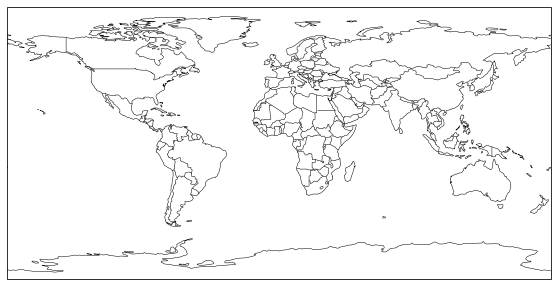

In [20]:
pp.figure(figsize=(10,5))

axes = pp.axes(projection=cartopy.crs.PlateCarree())

axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
# axes.add_feature(cartopy.feature.STATES.with_scale('10m'))

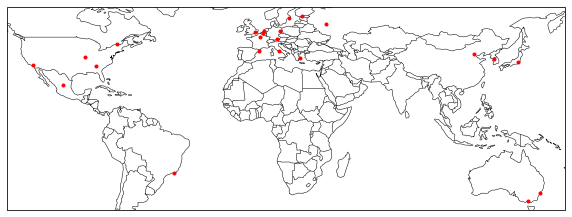

In [21]:
pp.figure(figsize=(10,5))
axes = pp.axes(projection=cartopy.crs.PlateCarree())
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

for pos in locations.values():
    axes.plot(pos.longitude, pos.latitude, 'r.')

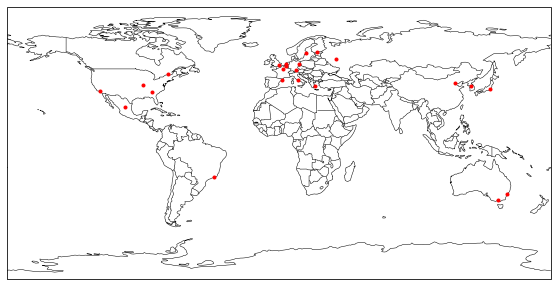

In [22]:
pp.figure(figsize=(10,5))
axes = pp.axes(projection=cartopy.crs.PlateCarree())
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

for pos in locations.values():
    axes.plot(pos.longitude, pos.latitude, 'r.')
    
pp.axis(xmin=-180,xmax=180,ymin=-90,ymax=90);

In [23]:
for i, city in enumerate(cities[:10]):
    print(i, city)

0 Athens
1 Paris
2 St Louis
3 London
4 Stockholm
5 Antwerp
6 Paris
7 Amsterdam
8 Los Angeles
9 Berlin


In [24]:
for city in sorted(cities[:10]):
    print(city)

Amsterdam
Antwerp
Athens
Berlin
London
Los Angeles
Paris
Paris
St Louis
Stockholm


In [25]:
for city in sorted(cities[:10], key=len):
    print(city)

Paris
Paris
Athens
London
Berlin
Antwerp
St Louis
Stockholm
Amsterdam
Los Angeles


In [26]:
for i, city in enumerate(reversed(cities[:10])):
    print(i, city)

0 Berlin
1 Los Angeles
2 Amsterdam
3 Paris
4 Antwerp
5 Stockholm
6 London
7 St Louis
8 Paris
9 Athens


In [27]:
for year, city in zip(years[:10], cities):
    print(year,city)

1896 Athens
1900 Paris
1904 St Louis
1908 London
1912 Stockholm
1920 Antwerp
1924 Paris
1928 Amsterdam
1932 Los Angeles
1936 Berlin


In [28]:
import itertools

In [29]:
for iteration in itertools.repeat(years,3):
    for year in iteration:
        print(year)

1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016
1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016
1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016


In [30]:
for iteration in itertools.chain(years, cities):
    print(iteration)

1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008
2012
2016
Athens
Paris
St Louis
London
Stockholm
Antwerp
Paris
Amsterdam
Los Angeles
Berlin
London
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Los Angeles
Seoul
Barcelona
Atlanta
Sydney
Athens
Beijing
London
Rio


In [43]:
for i in range(0,len(years)):
    years[i]=int(years[i])

In [44]:
for i in range(len(years)):
    print(type(years[i]))

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [45]:
for iteration in itertools.accumulate(years):
    print(iteration)

1896
3796
5700
7608
9520
11440
13364
15292
17224
19160
21108
23060
25016
26976
28940
30908
32880
34856
36836
38820
40808
42800
44796
46796
48800
50808
52820
54836


In [48]:
for iteration in itertools.permutations(years[:3]):
    print(iteration)

(1896, 1900, 1904)
(1896, 1904, 1900)
(1900, 1896, 1904)
(1900, 1904, 1896)
(1904, 1896, 1900)
(1904, 1900, 1896)


In [53]:
for iteration in itertools.combinations(years[:3], 3):
    print(iteration)

(1896, 1900, 1904)


In [54]:
for iteration in itertools.combinations(years[:3], 2):
    print(iteration)

(1896, 1900)
(1896, 1904)
(1900, 1904)
